## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

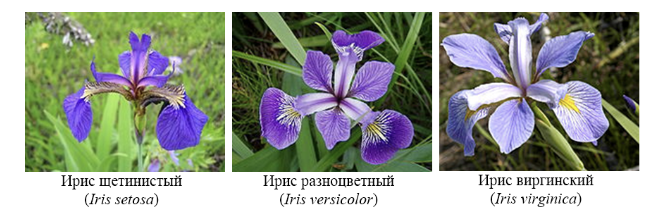

Импортируем необходимые библиотеки:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [11]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [13]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [16]:
iris_df = pd.DataFrame(iris.data)

In [17]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
iris_df.shape

(150, 6)

In [20]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [23]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [25]:
iris_df.hist(figsize = (15,10), bins = 50);

In [26]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [28]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [29]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [30]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

<Axes: >

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

# Обучение классификатора

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [34]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 
             'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=19,
    stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")
print()


Обучающая выборка: 105 samples
Тестовая выборка: 45 samples



In [35]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=iris.feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=iris.feature_names)
dfull = xgb.DMatrix(X, label=y, feature_names=iris.feature_names)

In [36]:
print("=" * 60)
print("НАСТРОЙКА ПАРАМЕТРОВ XGBOOST")
print("=" * 60)

params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 4,
    'eta': 0.1, 
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': ['merror', 'mlogloss'],
    'seed': 19,
    'verbosity': 0
}

print("Параметры модели:")
for key, value in params.items():
    print(f"  {key}: {value}")
print()

НАСТРОЙКА ПАРАМЕТРОВ XGBOOST
Параметры модели:
  objective: multi:softmax
  num_class: 3
  max_depth: 4
  eta: 0.1
  subsample: 0.8
  colsample_bytree: 0.8
  eval_metric: ['merror', 'mlogloss']
  seed: 19
  verbosity: 0



In [37]:
print("=" * 60)
print("ОБУЧЕНИЕ МОДЕЛИ")
print("=" * 60)

evals_result = {}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dtest, 'val')],
    evals_result=evals_result,
    early_stopping_rounds=20,
    verbose_eval=10
)

print(f"\nОбучение завершено после {model.best_iteration + 1} эпох")
print(f"Лучший результат достигнут на эпохе {model.best_iteration + 1}")
print()

ОБУЧЕНИЕ МОДЕЛИ
[0]	train-merror:0.03810	train-mlogloss:0.97594	val-merror:0.00000	val-mlogloss:0.97045
[10]	train-merror:0.03810	train-mlogloss:0.37841	val-merror:0.00000	val-mlogloss:0.35834
[20]	train-merror:0.01905	train-mlogloss:0.18525	val-merror:0.00000	val-mlogloss:0.16353
[30]	train-merror:0.00952	train-mlogloss:0.10904	val-merror:0.00000	val-mlogloss:0.09018
[40]	train-merror:0.00000	train-mlogloss:0.07411	val-merror:0.00000	val-mlogloss:0.06089
[50]	train-merror:0.00000	train-mlogloss:0.05605	val-merror:0.00000	val-mlogloss:0.04919
[60]	train-merror:0.00000	train-mlogloss:0.04861	val-merror:0.00000	val-mlogloss:0.04593
[70]	train-merror:0.00000	train-mlogloss:0.04328	val-merror:0.02222	val-mlogloss:0.04589
[80]	train-merror:0.00000	train-mlogloss:0.03979	val-merror:0.02222	val-mlogloss:0.04774
[86]	train-merror:0.00000	train-mlogloss:0.03840	val-merror:0.02222	val-mlogloss:0.04697

Обучение завершено после 67 эпох
Лучший результат достигнут на эпохе 67



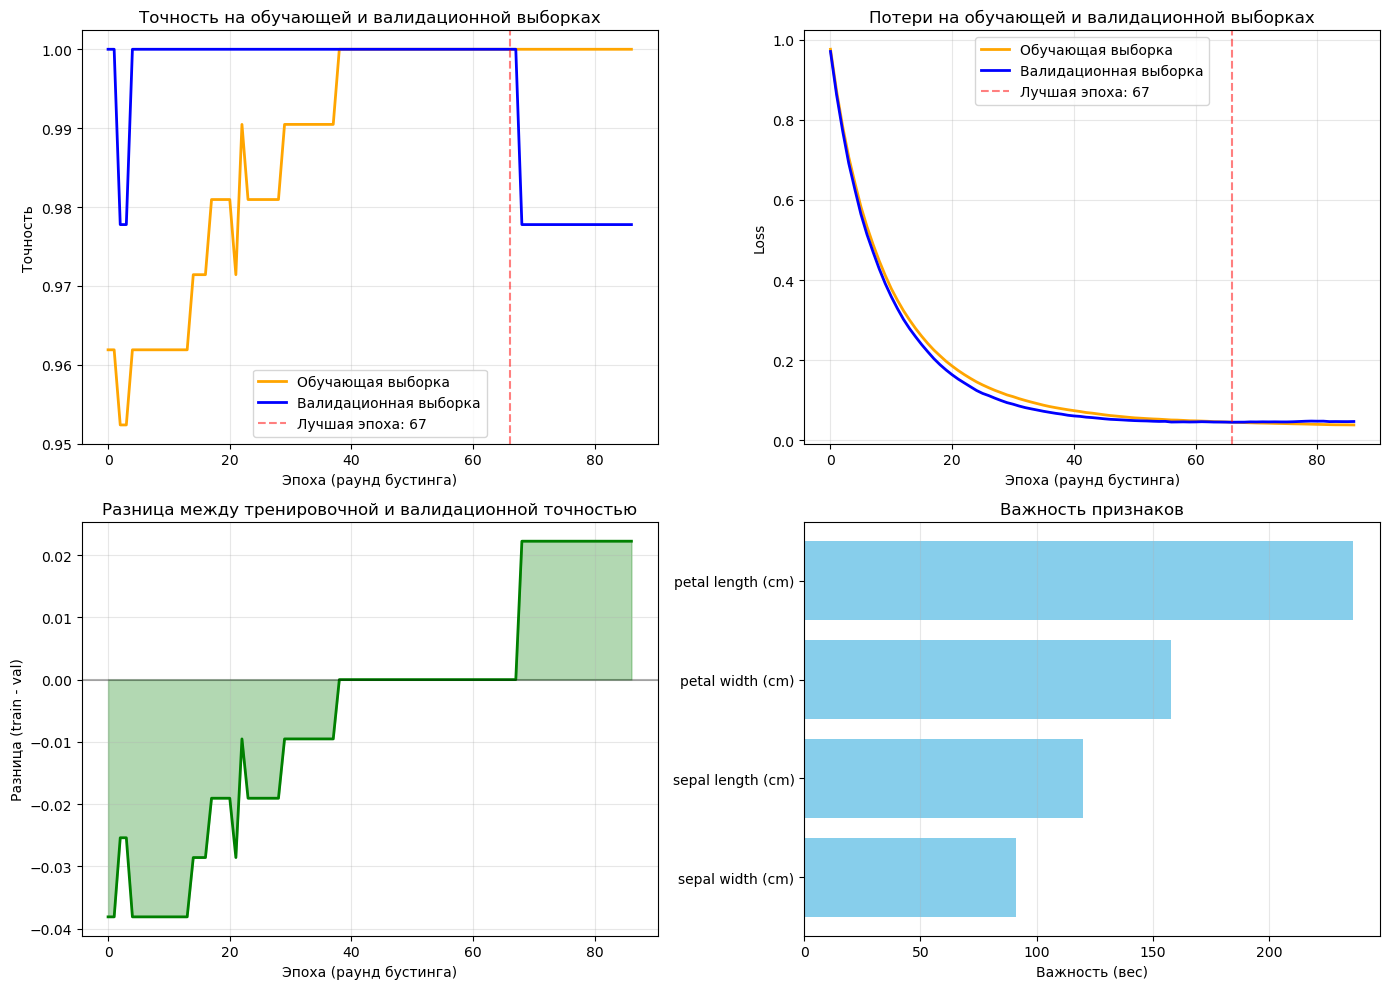

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

train_error = evals_result['train']['merror']
val_error = evals_result['val']['merror']
train_accuracy = [1 - err for err in train_error]
val_accuracy = [1 - err for err in val_error]

epochs = range(len(train_accuracy))

axes[0, 0].plot(epochs, train_accuracy, 'orange', label='Обучающая выборка', linewidth=2)
axes[0, 0].plot(epochs, val_accuracy, 'blue', label='Валидационная выборка', linewidth=2)
axes[0, 0].set_title('Точность на обучающей и валидационной выборках')
axes[0, 0].set_xlabel('Эпоха (раунд бустинга)')
axes[0, 0].set_ylabel('Точность')
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(x=model.best_iteration, color='red', linestyle='--', 
                   alpha=0.5, label=f'Лучшая эпоха: {model.best_iteration + 1}')
axes[0, 0].legend(loc='best')

train_loss = evals_result['train']['mlogloss']
val_loss = evals_result['val']['mlogloss']

axes[0, 1].plot(epochs, train_loss, 'orange', label='Обучающая выборка', linewidth=2)
axes[0, 1].plot(epochs, val_loss, 'blue', label='Валидационная выборка', linewidth=2)
axes[0, 1].set_title('Потери на обучающей и валидационной выборках')
axes[0, 1].set_xlabel('Эпоха (раунд бустинга)')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=model.best_iteration, color='red', linestyle='--', 
                   alpha=0.5, label=f'Лучшая эпоха: {model.best_iteration + 1}')
axes[0, 1].legend(loc='best')

accuracy_diff = [train_acc - val_acc for train_acc, val_acc in zip(train_accuracy, val_accuracy)]
axes[1, 0].plot(epochs, accuracy_diff, 'green', linewidth=2)
axes[1, 0].set_title('Разница между тренировочной и валидационной точностью')
axes[1, 0].set_xlabel('Эпоха (раунд бустинга)')
axes[1, 0].set_ylabel('Разница (train - val)')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].fill_between(epochs, accuracy_diff, alpha=0.3, color='green')

importance = model.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values('importance', ascending=True)

axes[1, 1].barh(importance_df['feature'], importance_df['importance'], color='skyblue')
axes[1, 1].set_title('Важность признаков')
axes[1, 1].set_xlabel('Важность (вес)')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [39]:
print("=" * 60)
print("ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ")
print("=" * 60)

y_pred_test = model.predict(dtest)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Точность модели на тестовых данных: {test_accuracy * 100:.2f}%")

print("\nОтчет о классификации на тестовых данных:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ
Точность модели на тестовых данных: 97.78%

Отчет о классификации на тестовых данных:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [40]:
print("=" * 60)
print("ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ")
print("=" * 60)

predictions = model.predict(dfull)
print(f"Первые 10 предсказаний: {predictions[:10]}")
print(f"Фактические метки: {y.values[:10]}")
print()

ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ
Первые 10 предсказаний: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Фактические метки: [0 0 0 0 0 0 0 0 0 0]



ФИНАЛЬНЫЙ ОТЧЕТ ПО КЛАССИФИКАЦИИ
Отчет по классификации на всех данных:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      1.00      0.99        50
   virginica       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



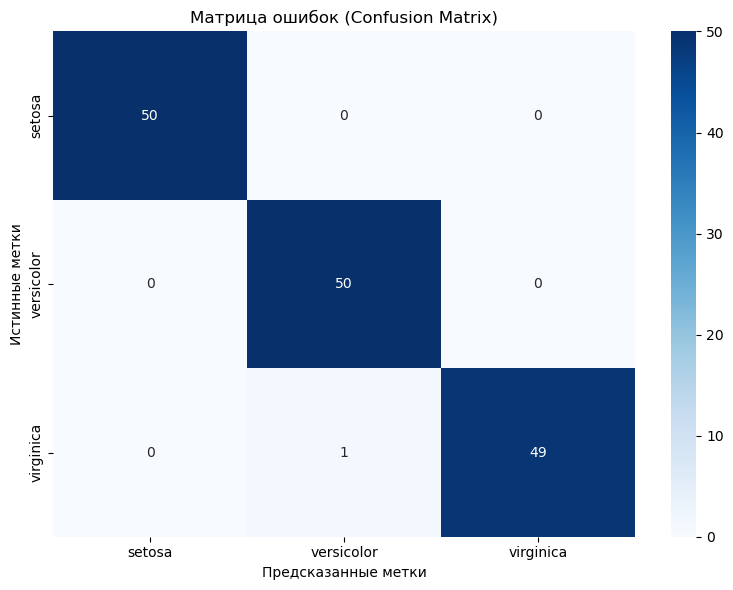

In [41]:
print("=" * 60)
print("ФИНАЛЬНЫЙ ОТЧЕТ ПО КЛАССИФИКАЦИИ")
print("=" * 60)

# Предсказания на всех данных для финального отчета
y_pred_full = model.predict(dfull)

print("Отчет по классификации на всех данных:")
print(classification_report(y, y_pred_full, target_names=iris.target_names))

# Матрица ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred_full)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.tight_layout()
plt.show()

# Классическая модель

### XGB

In [109]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss',
    use_label_encoder=False
)

In [111]:
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

xgb_y_train_predict = xgb_model.predict(X_train)
xgb_y_test_predict = xgb_model.predict(X_test)

print("\nОтчет по классификации XGBoost на тестовых данных:")
print(classification_report(y_test, xgb_y_test_predict, 
                           target_names=iris.target_names))



Отчет по классификации XGBoost на тестовых данных:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_accuracy = accuracy_score(y_train, xgb_y_train_predict)
test_accuracy = accuracy_score(y_test, xgb_y_test_predict)

print("=" * 60)
print("ДЕТАЛЬНЫЕ МЕТРИКИ XGBOOST")
print("=" * 60)
print(f"Точность на обучающей выборке: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Точность на тестовой выборке:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Разница между train и test accuracy: {(train_accuracy - test_accuracy)*100:.2f}%")

ДЕТАЛЬНЫЕ МЕТРИКИ XGBOOST
Точность на обучающей выборке: 1.0000 (100.00%)
Точность на тестовой выборке:  0.9778 (97.78%)
Разница между train и test accuracy: 2.22%



ВАЖНОСТЬ ПРИЗНАКОВ XGBOOST
          Признак  Важность
 petal width (cm)  0.467682
petal length (cm)  0.451190
sepal length (cm)  0.041391
 sepal width (cm)  0.039738


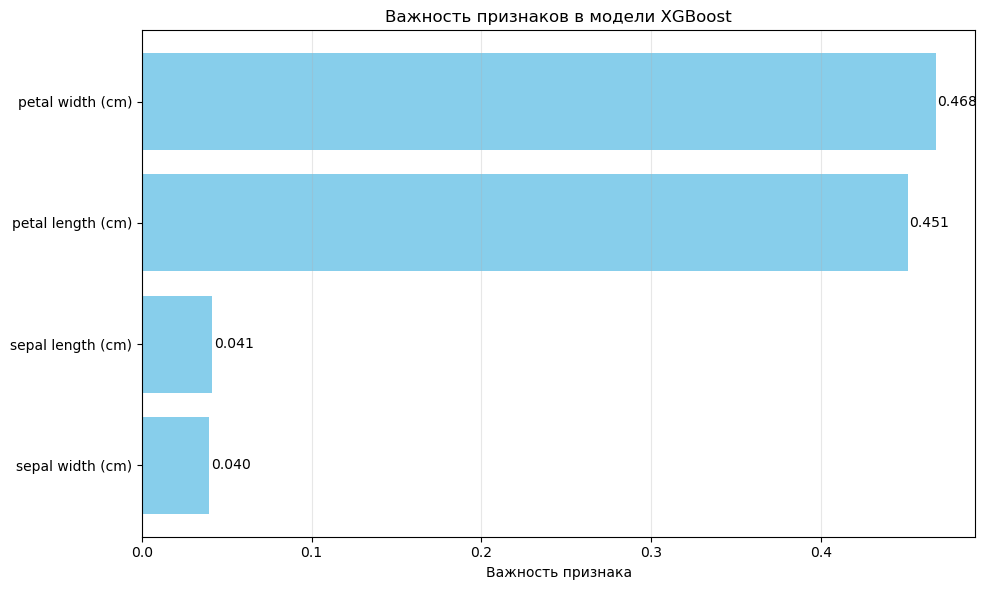

In [115]:
print("\n" + "=" * 60)
print("ВАЖНОСТЬ ПРИЗНАКОВ XGBOOST")
print("=" * 60)

importance_scores = xgb_model.feature_importances_
feature_names = iris.feature_names

importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importance_scores
}).sort_values('Важность', ascending=False)

print(importance_df.to_string(index=False))

plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Признак'], importance_df['Важность'], color='skyblue')
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели XGBoost')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score

print("\n" + "=" * 60)
print("КРОСС-ВАЛИДАЦИЯ XGBOOST")
print("=" * 60)

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

print(f"Результаты 5-кратной кросс-валидации:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nСредняя точность: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")


КРОСС-ВАЛИДАЦИЯ XGBOOST
Результаты 5-кратной кросс-валидации:
  Fold 1: 0.9667
  Fold 2: 0.9667
  Fold 3: 0.9333
  Fold 4: 0.9333
  Fold 5: 0.9667

Средняя точность: 0.9533 (95.33%)
Стандартное отклонение: 0.0163


In [119]:
print("\n" + "=" * 60)
print("ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ")
print("=" * 60)

xgb_all_predictions = xgb_model.predict(X)
xgb_all_probabilities = xgb_model.predict_proba(X)

print("Первые 10 предсказаний:")
for i in range(10):
    print(f"  Образец {i+1}: Фактический класс={y[i]} ({iris.target_names[y[i]]}), "
          f"Предсказанный={xgb_all_predictions[i]} ({iris.target_names[xgb_all_predictions[i]]})")

print(f"\nМатрица вероятностей (первые 5 образцов):")
probs_df = pd.DataFrame(xgb_all_probabilities[:5], 
                       columns=iris.target_names)
print(probs_df.to_string(index=True))


ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ
Первые 10 предсказаний:
  Образец 1: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 2: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 3: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 4: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 5: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 6: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 7: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 8: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 9: Фактический класс=0 (setosa), Предсказанный=0 (setosa)
  Образец 10: Фактический класс=0 (setosa), Предсказанный=0 (setosa)

Матрица вероятностей (первые 5 образцов):
     setosa  versicolor  virginica
0  0.989628    0.007954   0.002418
1  0.990117    0.007238   0.002645
2  0.990256    0.007218   0.002526
3  0.990298    0.007177   0.002526
4  0.990256    0.007218   0.002526


### Ансамблевая модель

In [121]:
print("=" * 60)
print("СТЕКИНГ-АНСАМБЛЬ С МЕТА-МОДЕЛЬЮ")
print("=" * 60)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

СТЕКИНГ-АНСАМБЛЬ С МЕТА-МОДЕЛЬЮ


In [125]:
xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=80,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Модель 2: Random Forest (бэггинг)
rf_base = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Модель 3: SVM с оптимизированными параметрами
svm_base = SVC(
    kernel='rbf',
    C=0.5,
    gamma='scale',
    probability=True,
    random_state=42
)

# Модель 4: K-Nearest Neighbors с автоматическим подбором k
knn_base = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='minkowski',
    p=2
)

print("Создано 4 разнородные базовые модели:")
print("  • XGBoost - градиентный бустинг")
print("  • Random Forest - бэггинг")
print("  • SVM с RBF ядром")
print("  • K-Nearest Neighbors")

Создано 4 разнородные базовые модели:
  • XGBoost - градиентный бустинг
  • Random Forest - бэггинг
  • SVM с RBF ядром
  • K-Nearest Neighbors


In [127]:
print("\n2. СОЗДАНИЕ МЕТА-МОДЕЛИ")

# Логистическая регрессия как мета-модель
meta_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=0.1,
    max_iter=1000,
    random_state=42
)

print("Мета-модель: Logistic Regression")
print("(обучается на предсказаниях базовых моделей)")


2. СОЗДАНИЕ МЕТА-МОДЕЛИ
Мета-модель: Logistic Regression
(обучается на предсказаниях базовых моделей)


In [129]:
base_models = [
    ('xgb', xgb_base),
    ('rf', rf_base),
    ('svm', svm_base),
    ('knn', knn_base)
]

# Создаем Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,           # 5-кратная кросс-валидация для обучения базовых моделей
    passthrough=False,  # Не используем исходные признаки на втором уровне
    n_jobs=-1       # Используем все ядра процессора
)

print("Параметры Stacking Classifier:")
print(f"  • Количество базовых моделей: {len(base_models)}")
print(f"  • Кросс-валидация: {stacking_model.cv}-кратная")
print(f"  • Мета-модель: {stacking_model.final_estimator.__class__.__name__}")
print(f"  • Passthrough: {stacking_model.passthrough}")

Параметры Stacking Classifier:
  • Количество базовых моделей: 4
  • Кросс-валидация: 5-кратная
  • Мета-модель: LogisticRegression
  • Passthrough: False


In [131]:
print("\n" + "=" * 60)
print("4. ОБУЧЕНИЕ STACKING CLASSIFIER")
print("=" * 60)

print("Обучение модели...")

# Обучение модели
stacking_model.fit(X_train, y_train)

print("✓ Обучение завершено успешно!")


4. ОБУЧЕНИЕ STACKING CLASSIFIER
Обучение модели... (может занять несколько секунд)
✓ Обучение завершено успешно!


In [135]:
print("\n" + "=" * 60)
print("5. ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ")
print("=" * 60)

# Предсказания на обучающей и тестовой выборках
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Вероятности предсказаний
y_test_proba = stacking_model.predict_proba(X_test)

# Расчет метрик
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Точность на обучающей выборке: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Точность на тестовой выборке:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


# Детальный отчет по классификации
print("\nОтчет по классификации на тестовых данных:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


5. ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ
Точность на обучающей выборке: 1.0000 (100.00%)
Точность на тестовой выборке:  1.0000 (100.00%)

Отчет по классификации на тестовых данных:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [137]:
print("\n" + "=" * 60)
print("6. АНАЛИЗ РАБОТЫ STACKING CLASSIFIER")
print("=" * 60)

# Предсказания базовых моделей (для анализа)
print("Анализ предсказаний базовых моделей:")

# Обучаем базовые модели отдельно для анализа
for name, model in base_models:
    model.fit(X_train, y_train)
    base_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"  {name.upper()}: Точность = {base_acc:.4f} ({base_acc*100:.2f}%)")

print(f"\nStacking Classifier улучшил точность на:")
for name, model in base_models:
    base_acc = accuracy_score(y_test, model.predict(X_test))
    improvement = test_accuracy - base_acc
    if improvement > 0:
        print(f"  • {name.upper()}: +{improvement*100:.2f}%")



6. АНАЛИЗ РАБОТЫ STACKING CLASSIFIER
Анализ предсказаний базовых моделей:
  XGB: Точность = 0.9778 (97.78%)
  RF: Точность = 1.0000 (100.00%)
  SVM: Точность = 0.9778 (97.78%)
  KNN: Точность = 1.0000 (100.00%)

Stacking Classifier улучшил точность на:
  • XGB: +2.22%
  • SVM: +2.22%



7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


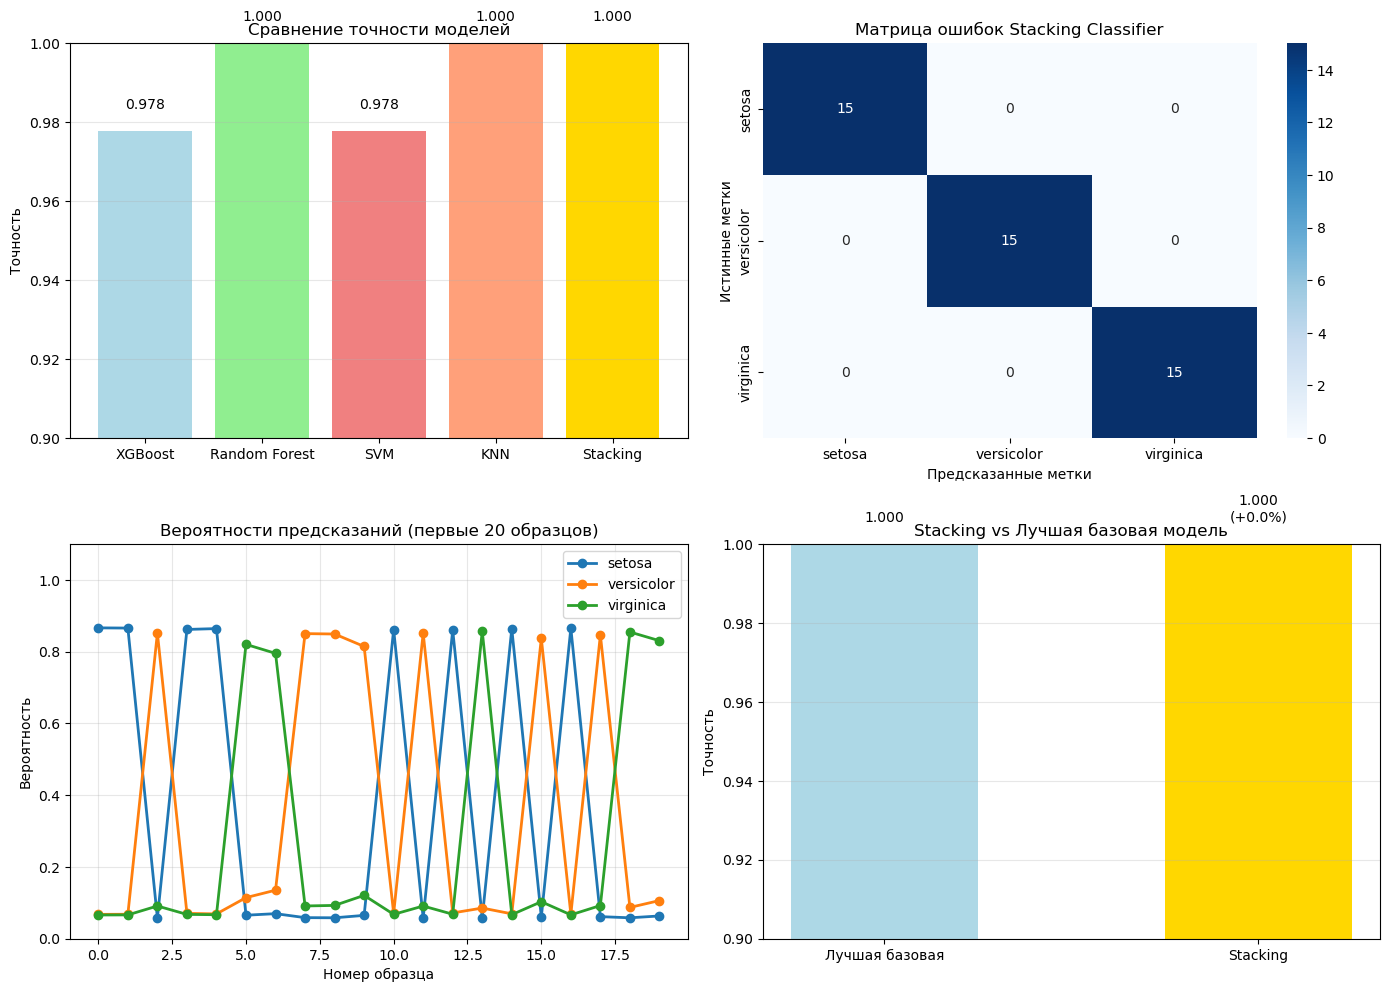

In [139]:
print("\n" + "=" * 60)
print("7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

# Создаем графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Сравнение точности базовых моделей и ансамбля
models_names = ['XGBoost', 'Random Forest', 'SVM', 'KNN', 'Stacking']
models_acc = []

for name, model in base_models:
    models_acc.append(accuracy_score(y_test, model.predict(X_test)))
models_acc.append(test_accuracy)

axes[0, 0].bar(models_names, models_acc, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'gold'])
axes[0, 0].set_title('Сравнение точности моделей')
axes[0, 0].set_ylabel('Точность')
axes[0, 0].set_ylim(0.9, 1.0)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for i, (name, acc) in enumerate(zip(models_names, models_acc)):
    axes[0, 0].text(i, acc + 0.005, f'{acc:.3f}', ha='center', va='bottom', fontsize=10)

# 2. Матрица ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
axes[0, 1].set_title('Матрица ошибок Stacking Classifier')
axes[0, 1].set_ylabel('Истинные метки')
axes[0, 1].set_xlabel('Предсказанные метки')

# 3. Вероятности предсказаний (для первых 20 образцов)
sample_indices = range(min(20, len(y_test_proba)))
for class_idx in range(3):
    axes[1, 0].plot(sample_indices, y_test_proba[:20, class_idx], 
                   marker='o', label=iris.target_names[class_idx], linewidth=2)
axes[1, 0].set_title('Вероятности предсказаний (первые 20 образцов)')
axes[1, 0].set_xlabel('Номер образца')
axes[1, 0].set_ylabel('Вероятность')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 1.1)

# 4. Сравнение с одиночными моделями
single_models = ['Лучшая базовая', 'Stacking']
best_base_acc = max(models_acc[:-1])
stacking_acc = test_accuracy

axes[1, 1].bar(single_models, [best_base_acc, stacking_acc], color=['lightblue', 'gold'], width=0.5)
axes[1, 1].set_title(f'Stacking vs Лучшая базовая модель')
axes[1, 1].set_ylabel('Точность')
axes[1, 1].set_ylim(0.9, 1.0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Добавляем значение улучшения
improvement = stacking_acc - best_base_acc
axes[1, 1].text(0, best_base_acc + 0.005, f'{best_base_acc:.3f}', ha='center', va='bottom')
axes[1, 1].text(1, stacking_acc + 0.005, f'{stacking_acc:.3f}\n(+{improvement*100:.1f}%)', 
               ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [147]:
print("\n" + "=" * 60)
print("8. ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ")
print("=" * 60)

all_predictions = stacking_model.predict(X)
all_probabilities = stacking_model.predict_proba(X)

print("Примеры предсказаний:")
print("-" * 50)

print("\nИтоговый отчет по классификации на всех данных:")
print(classification_report(y, all_predictions, target_names=iris.target_names))


8. ПРЕДСКАЗАНИЯ НА ВСЕХ ДАННЫХ
Примеры предсказаний:
--------------------------------------------------

Итоговый отчет по классификации на всех данных:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Вывод

Я обучил и протестировал три принципиально разных типа моделей машинного обучения. ИИ-модель с итеративным обучением показала, как полезно контролировать процесс обучения и визуализировать прогресс на каждой эпохе. Классическая модель продемонстрировала, что простота и интерпретируемость часто ценнее дополнительного процента точности, а иногда может и полезнее. Ансамблевая модель доказала, что комбинирование разных алгоритмов создаёт более устойчивую и надёжную систему, где слабости одних моделей компенсируются сильными сторонами других.

В процессе я понял, что не существует универсально лучшей модели — каждая решает свои задачи. Для быстрых прототипов идеальна классическая модель, для максимальной точности нужен ансамбль, а для исследовательских задач с глубоким анализом подходит ИИ-модель с поэтапным обучением. Главное — выбирать инструмент осознанно, понимая его сильные стороны и ограничения в контексте конкретной задачи. Это все что я впринципе понял :)
